Load image

In [ ]:
from PIL import Image
import os
import numpy as np

# Define the folder path
folder_path = os.path.join("Cleaned Breast Cancer Class", "benign")

# Initialize a list to store images
benign_images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            image = Image.open(file_path)
            # Optionally convert to a NumPy array
            image_array = np.array(image)
            # Append the image or its array to the list
            benign_images.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the number of images loaded
print(f"Loaded {len(benign_images)} images from {folder_path}")


Loaded 437 images from /kaggle/input/breast-cancer/Cleaned Breast Cancer Class/benign


In [ ]:
# Define the folder path
folder_path = os.path.join("Cleaned Breast Cancer Class", "malignant")

# Initialize a list to store images
malignant_images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            image = Image.open(file_path)
            # Optionally convert to a NumPy array
            image_array = np.array(image)
            # Append the image or its array to the list
            malignant_images.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the number of images loaded
print(f"Loaded {len(malignant_images)} images from {folder_path}")

Loaded 420 images from /kaggle/input/breast-cancer/Cleaned Breast Cancer Class/malignant


In [ ]:
# Define the folder path
folder_path = os.path.join("Cleaned Breast Cancer Class", "normal")

# Initialize a list to store images
normal_images = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image
            image = Image.open(file_path)
            # Optionally convert to a NumPy array
            image_array = np.array(image)
            # Append the image or its array to the list
            normal_images.append(image_array)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Display the number of images loaded
print(f"Loaded {len(normal_images)} images from {folder_path}")

Loaded 399 images from /kaggle/input/breast-cancer/Cleaned Breast Cancer Class/normal


Split data into train test valid

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# Combine the lists and create labels (normal, benign, and cancer)
X = np.array(benign_images + malignant_images + normal_images)
y = np.array([0] * len(benign_images) + [1] * len(malignant_images) + [2] * len(normal_images))

# Split dataset into train, validation, and test sets (80%, 10%, 10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state=42)

In [5]:
X_train.shape

(1004, 224, 224, 3)

1st Architecture

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam

# Input shape (assuming RGB images)
input_shape = (224, 224, 3)

# Build the CNN+LSTM model
def build_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # CNN layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # TimeDistributed and LSTM
    model.add(TimeDistributed(Flatten()))  # Flatten each spatial slice
    model.add(LSTM(64, return_sequences=False))  # LSTM layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(3, activation='softmax'))  # Multiclass classification

    return model

# Compile the model
model = build_cnn_lstm_model(input_shape)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Create tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    # callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 12, 384)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │       114,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,779 (561.64 KB)

 Trainable params: 143,779 (561.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.3357 - loss: 1.2965 - val_accuracy: 0.3095 - val_loss: 1.1135
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3454 - loss: 1.2435 - val_accuracy: 0.3810 - val_loss: 1.1004
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3509 - loss: 1.1798 - val_accuracy: 0.3730 - val_loss: 1.0884
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3438 - loss: 1.1553 - val_accuracy: 0.4048 - val_loss: 1.0879
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3829 - loss: 1.1362 - val_accuracy: 0.3413 - val_loss: 1.0867
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3764 - loss: 1.1151 - val_accuracy: 0.3254 - val_loss: 1.1007
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3451 - loss: 1.1417 - val_accuracy: 0.3889 - val_loss: 1.0726
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3697 - loss: 1.1226 - val_accuracy: 0.3651 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Test accuracy: 0.4444

Test Set Classification Report:
              precision    recall  f1-score   support

           0    0.41053   0.79592   0.54167        49
           1    0.57692   0.36585   0.44776        41
           2    0.40000   0.05556   0.09756        36

    accuracy                        0.44444       126
   macro avg    0.46248   0.40578   0.36233       126
weighted avg    0.46166   0.44444   0.38422       126



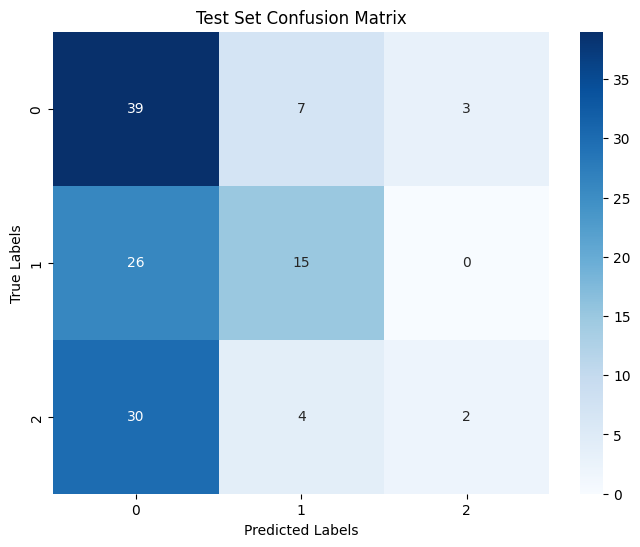

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities for the test set
test_predictions = model.predict(test_dataset)  # Output shape: (num_samples, num_classes)

# Get the predicted labels for the test set
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predicted_labels, digits=5))

# Generate a confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()


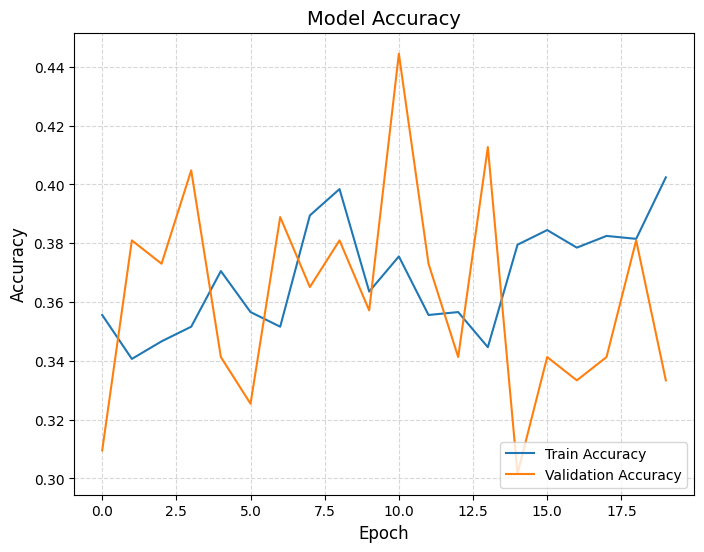

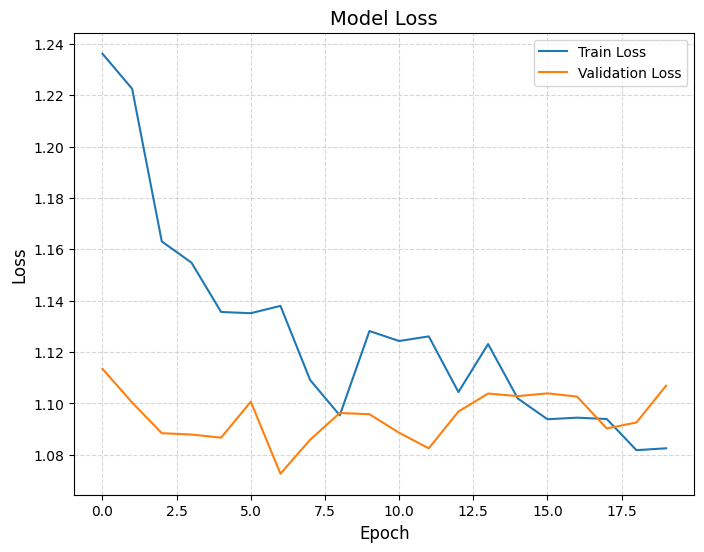

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


2nd Architecture

In [9]:
# Build the CNN+LSTM model
def build_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # CNN layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # TimeDistributed and LSTM
    model.add(TimeDistributed(Flatten()))  # Flatten each spatial slice
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64, return_sequences=False)) # LSTM layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(3, activation='softmax'))  # Multiclass classification

    return model

# Compile the model
model2 = build_cnn_lstm_model(input_shape)
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# Create tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history2 = model2.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    # callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 26, 832)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 26, 64)         │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,243 (1.08 MB)

 Trainable params: 282,243 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.3511 - loss: 1.1250 - val_accuracy: 0.3889 - val_loss: 1.0830
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3989 - loss: 1.0749 - val_accuracy: 0.3889 - val_loss: 1.0853
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4807 - loss: 1.0485 - val_accuracy: 0.3810 - val_loss: 1.1020
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4312 - loss: 1.0559 - val_accuracy: 0.5317 - val_loss: 1.0249
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4396 - loss: 1.0335 - val_accuracy: 0.4286 - val_loss: 1.0519
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4265 - loss: 1.0266 - val_accuracy: 0.4841 - val_loss: 1.0311
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4857 - loss: 1.0238 - val_accuracy: 0.5238 - val_loss: 1.0316
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4470 - loss: 1.0022 - val_accuracy: 0.5000 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
Test accuracy: 0.3889

Test Set Classification Report:
              precision    recall  f1-score   support

           0    0.38889   1.00000   0.56000        49
           1    0.00000   0.00000   0.00000        41
           2    0.00000   0.00000   0.00000        36

    accuracy                        0.38889       126
   macro avg    0.12963   0.33333   0.18667       126
weighted avg    0.15123   0.38889   0.21778       126



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


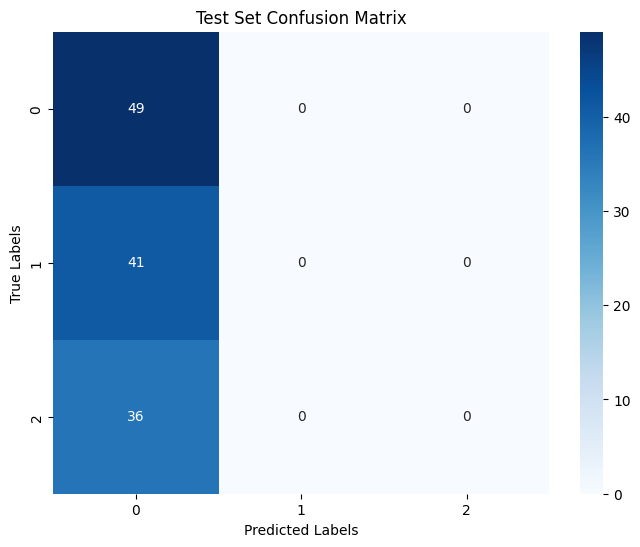

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities for the test set
test_predictions = model2.predict(test_dataset)  # Output shape: (num_samples, num_classes)

# Get the predicted labels for the test set
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predicted_labels, digits=5))

# Generate a confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()


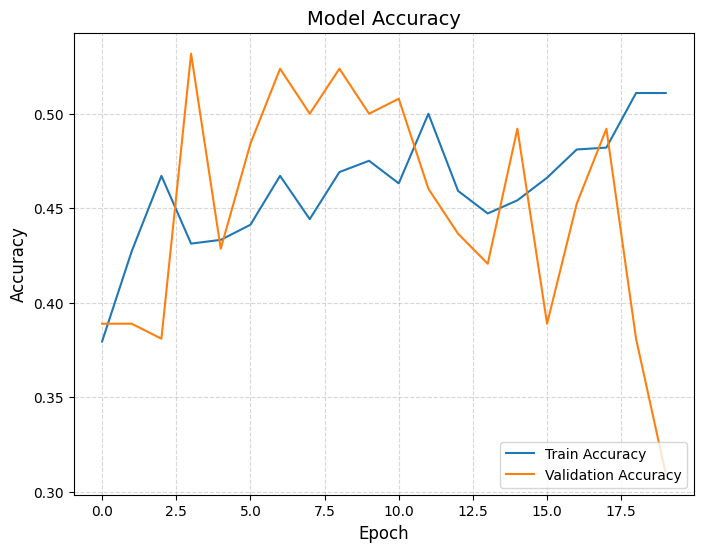

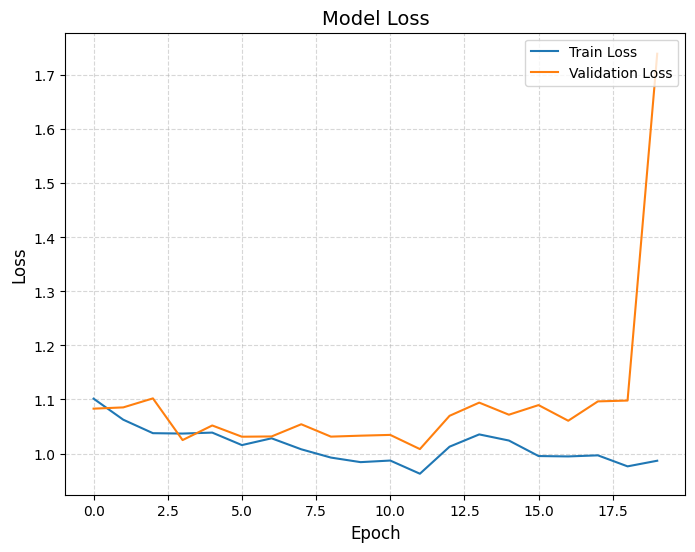

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


3rd Architecture

In [12]:
# Build the CNN+LSTM model
def build_cnn_lstm_model(input_shape):
    model = Sequential()
    
    # CNN layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # TimeDistributed and LSTM
    model.add(TimeDistributed(Flatten()))  # Flatten each spatial slice
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64, return_sequences=False)) # LSTM layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(3, activation='softmax'))  # Multiclass classification

    return model

# Compile the model
model3 = build_cnn_lstm_model(input_shape)
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

# Create tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

# Early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history3 = model3.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    # callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 54, 1728)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 54, 64)         │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,371 (1.92 MB)

 Trainable params: 502,371 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3687 - loss: 1.1256 - val_accuracy: 0.4048 - val_loss: 1.0728
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4078 - loss: 1.0745 - val_accuracy: 0.4206 - val_loss: 1.0721
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4448 - loss: 1.0510 - val_accuracy: 0.3889 - val_loss: 1.0815
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4366 - loss: 1.0527 - val_accuracy: 0.3810 - val_loss: 1.0870
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4209 - loss: 1.0372 - val_accuracy: 0.4286 - val_loss: 1.0657
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4369 - loss: 1.0212 - val_accuracy: 0.5000 - val_loss: 1.0556
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4866 - loss: 1.0053 - val_accuracy: 0.4603 - val_loss: 1.0574
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4267 - loss: 1.0031 - val_accuracy: 0.4841 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
Test accuracy: 0.3968

Test Set Classification Report:
              precision    recall  f1-score   support

           0    0.54545   0.12245   0.20000        49
           1    0.71429   0.24390   0.36364        41
           2    0.33663   0.94444   0.49635        36

    accuracy                        0.39683       126
   macro avg    0.53212   0.43693   0.35333       126
weighted avg    0.54073   0.39683   0.33792       126



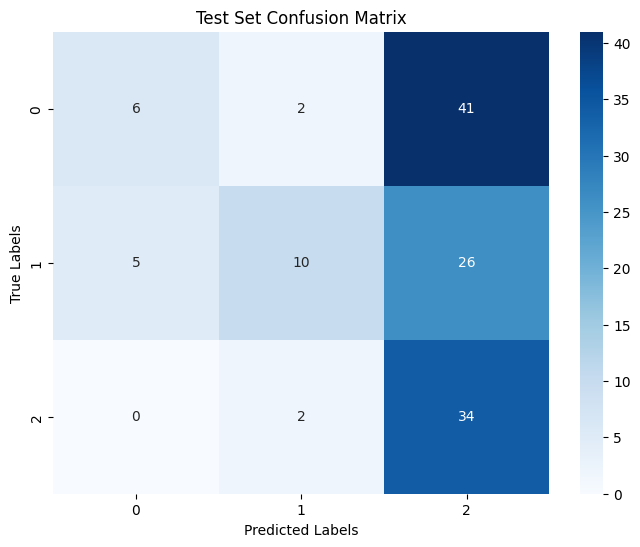

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict probabilities for the test set
test_predictions = model3.predict(test_dataset)  # Output shape: (num_samples, num_classes)

# Get the predicted labels for the test set
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

# Generate a classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predicted_labels, digits=5))

# Generate a confusion matrix for the test set
cm_test = confusion_matrix(y_test, test_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Set Confusion Matrix')
plt.show()


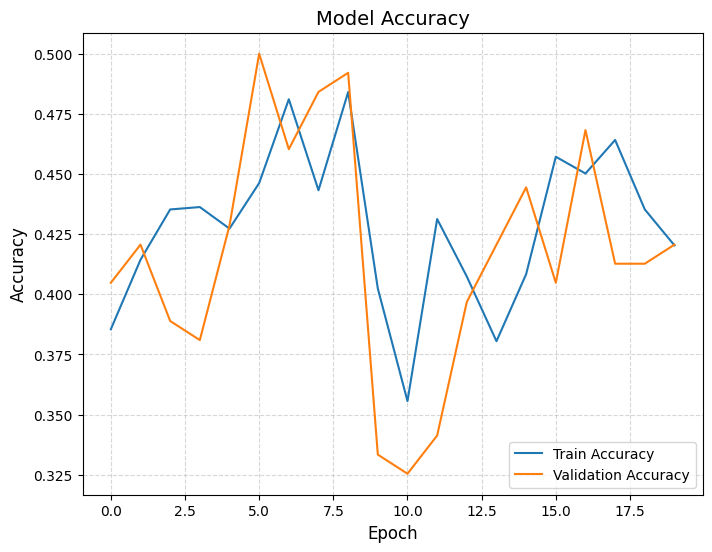

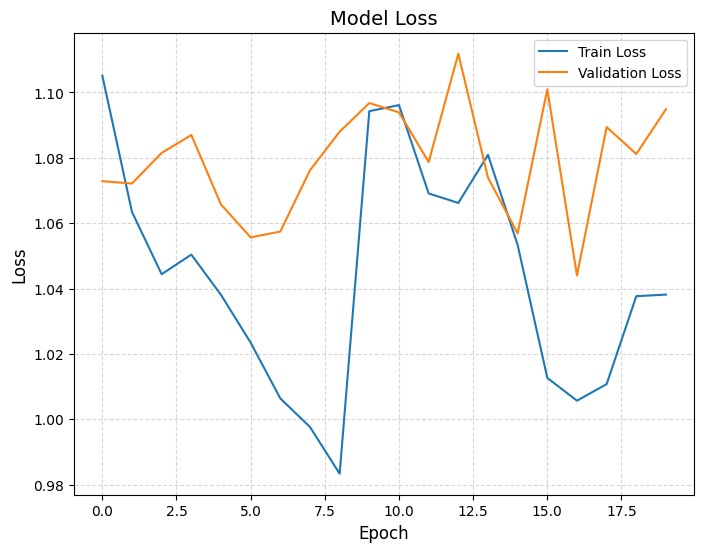

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


Hypertuning

In [16]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Define the CNN+LSTM model function
def build_cnn_lstm_model(input_shape, filters, kernel_size, lstm_units, dropout_rate):
    model = Sequential()
    
    # CNN layers
    model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # TimeDistributed and LSTM
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))

    # Output layer for multiclass classification
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Define hyperparameter ranges
filter_range = [64, 128]           # Filters in convolutional layers
kernel_size_range = [(3, 3), (5, 5)]   # Kernel sizes
lstm_units_range = [32, 64, 128]       # LSTM units
dropout_rate_range = [0.3, 0.5, 0.7]   # Dropout rates
epochs_range = [10, 20, 30]            # Number of epochs

# Number of random trials
n_trials = 10

# Initialize variables to track the best configuration
best_params = None
best_val_accuracy = 0.0
results = []

# Random Search Loop
for trial in range(n_trials):
    # Randomly sample hyperparameters
    filters = random.choice(filter_range)
    kernel_size = random.choice(kernel_size_range)
    lstm_units = random.choice(lstm_units_range)
    dropout_rate = random.choice(dropout_rate_range)
    epochs = random.choice(epochs_range)
    
    print(f"Trial {trial + 1}/{n_trials}: filters={filters}, kernel_size={kernel_size}, "
          f"lstm_units={lstm_units}, dropout_rate={dropout_rate}, epochs={epochs}")
    
    # Build the model
    model = build_cnn_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                                 filters=filters, 
                                 kernel_size=kernel_size, 
                                 lstm_units=lstm_units, 
                                 dropout_rate=dropout_rate)
                             
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    history = model.fit(
        train_dataset,
        validation_data=valid_dataset,
        epochs=epochs,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate the model on the validation set
    val_accuracy = max(history.history['val_accuracy'])
    results.append((filters, kernel_size, lstm_units, dropout_rate, epochs, val_accuracy))
    
    # Update the best parameters if the current configuration is better
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = (filters, kernel_size, lstm_units, dropout_rate, epochs)

# Output all configurations and the best one
for result in results:
    print(f"Configuration: filters={result[0]}, kernel_size={result[1]}, lstm_units={result[2]}, "
          f"dropout_rate={result[3]}, epochs={result[4]}, val_accuracy={result[5]:.4f}")

print(f"Best hyperparameters: filters={best_params[0]}, kernel_size={best_params[1]}, "
      f"lstm_units={best_params[2]}, dropout_rate={best_params[3]}, epochs={best_params[4]}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")


Trial 1/10: filters=64, kernel_size=(3, 3), lstm_units=128, dropout_rate=0.3, epochs=30
Trial 2/10: filters=64, kernel_size=(5, 5), lstm_units=32, dropout_rate=0.5, epochs=20
Trial 3/10: filters=128, kernel_size=(3, 3), lstm_units=64, dropout_rate=0.3, epochs=10
Trial 4/10: filters=64, kernel_size=(3, 3), lstm_units=64, dropout_rate=0.5, epochs=30
Trial 5/10: filters=128, kernel_size=(3, 3), lstm_units=32, dropout_rate=0.5, epochs=20
Trial 6/10: filters=128, kernel_size=(5, 5), lstm_units=128, dropout_rate=0.5, epochs=20
Trial 7/10: filters=64, kernel_size=(3, 3), lstm_units=64, dropout_rate=0.5, epochs=20
Trial 8/10: filters=128, kernel_size=(3, 3), lstm_units=32, dropout_rate=0.5, epochs=20
Trial 9/10: filters=64, kernel_size=(5, 5), lstm_units=64, dropout_rate=0.3, epochs=10
Trial 10/10: filters=64, kernel_size=(5, 5), lstm_units=128, dropout_rate=0.5, epochs=30
Configuration: filters=64, kernel_size=(3, 3), lstm_units=128, dropout_rate=0.3, epochs=30, val_accuracy=0.4524
Configurat

Retrain with best params

In [17]:
# Rebuild the best CNN+LSTM model using the best parameters
best_cnn_lstm_model = build_cnn_lstm_model(
    input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]),
    filters=best_params[0],       # Best number of filters
    kernel_size=best_params[1],   # Best kernel size
    lstm_units=best_params[2],    # Best LSTM units
    dropout_rate=best_params[3]   # Best dropout rate
)

# Retrain the best model on the full training dataset
history = best_cnn_lstm_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=best_params[4],  # Best number of epochs
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluate the best model on the test dataset
test_loss, test_accuracy = best_cnn_lstm_model.evaluate(test_dataset, verbose=0)

# Print the test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.3256 - loss: 1.1941 - val_accuracy: 0.3095 - val_loss: 1.1048
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3703 - loss: 1.1261 - val_accuracy: 0.3730 - val_loss: 1.1023
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3600 - loss: 1.1124 - val_accuracy: 0.3095 - val_loss: 1.0999
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.3604 - loss: 1.1233 - val_accuracy: 0.3254 - val_loss: 1.0994
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3432 - loss: 1.1113 - val_accuracy: 0.3413 - val_loss: 1.0951
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3425 - loss: 1.1330 - val_accuracy: 0.3492 - val_loss: 1.0967
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3303 - loss: 1.1277 - val_accuracy: 0.3016 - val_loss: 1.1034
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.3361 - loss: 1.1366 - val_accuracy: 0.3492 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.46      0.22      0.30        49
     Class 1       0.20      0.02      0.04        41
     Class 2       0.28      0.75      0.41        36

    accuracy                           0.31       126
   macro avg       0.31      0.33      0.25       126
weighted avg       0.32      0.31      0.25       126



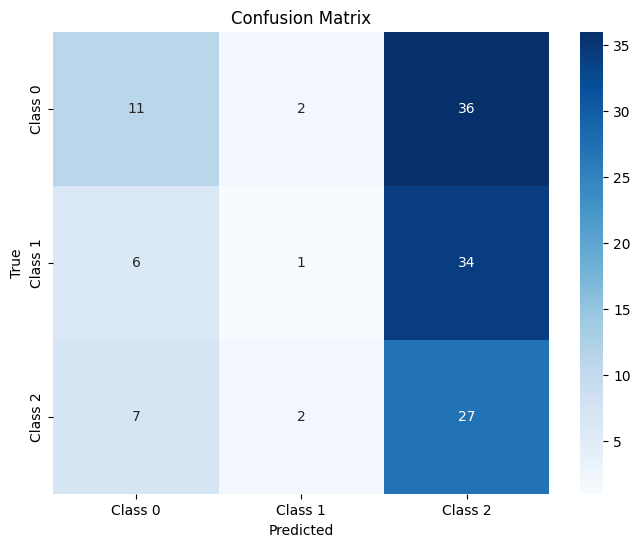

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test dataset
y_true = np.concatenate([y for _, y in test_dataset], axis=0)
y_pred = np.argmax(best_cnn_lstm_model.predict(test_dataset), axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


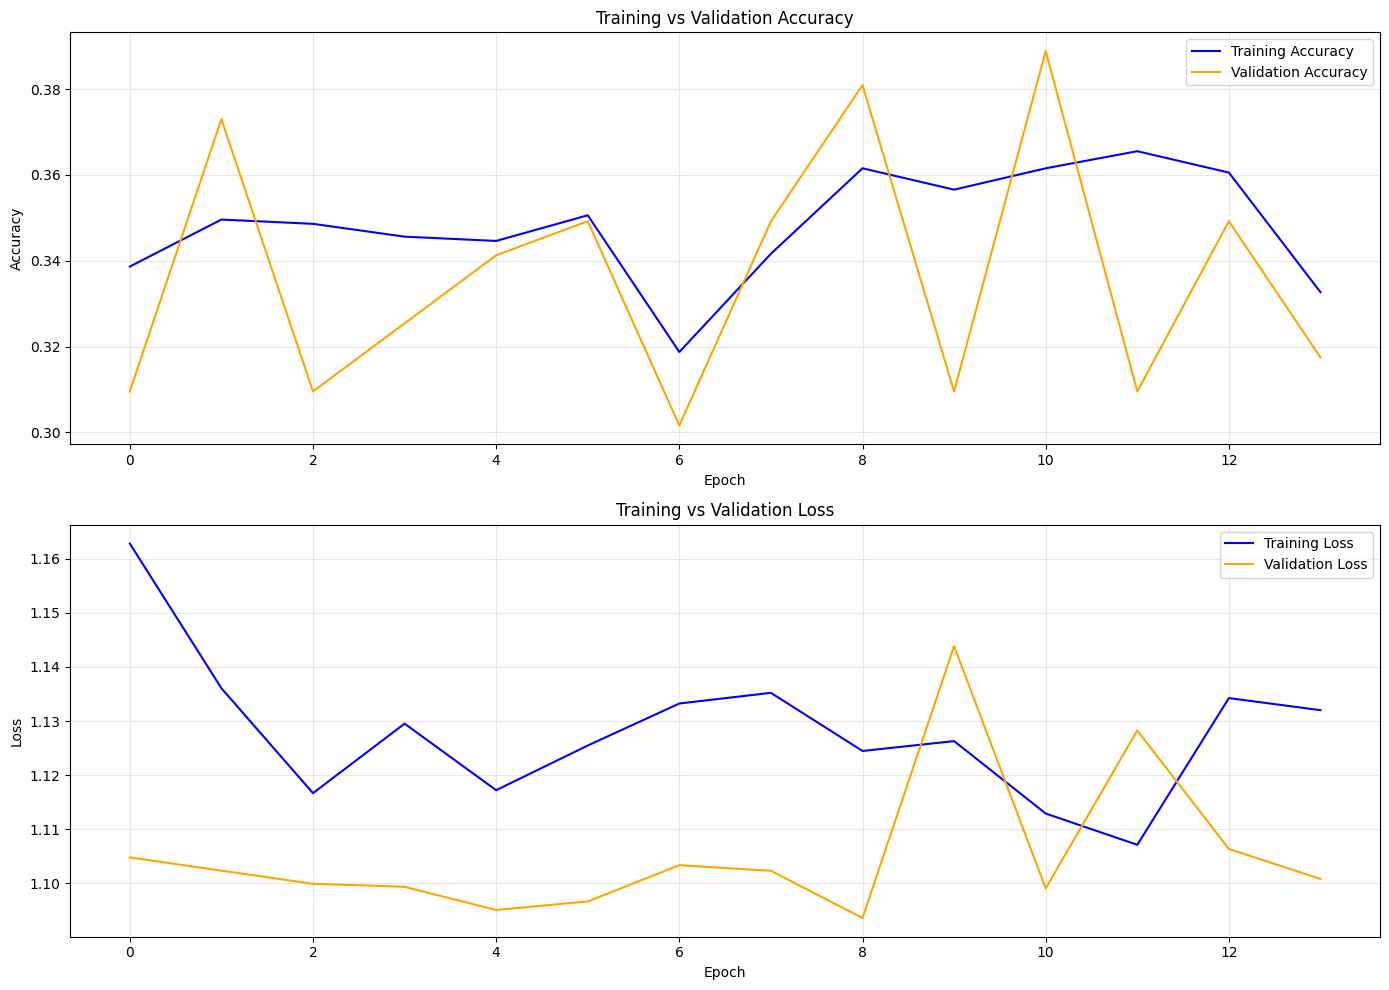

In [20]:
# Extract training and validation metrics from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrics
plt.figure(figsize=(14, 10))

# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label="Training Accuracy", color='blue')
plt.plot(val_accuracy, label="Validation Accuracy", color='orange')
plt.title("Training vs Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.grid(alpha=0.3)

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(train_loss, label="Training Loss", color='blue')
plt.plot(val_loss, label="Validation Loss", color='orange')
plt.title("Training vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
